In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances
pd.set_option('display.max_columns', 500)
%matplotlib inline

df=pd.read_csv('http://www.salemmarafi.com/wp-content/uploads/2014/04/lastfm-matrix-germany.csv')
X = df.drop(['user'],1)
item_item = 1-pairwise_distances(X[0:1000].T, metric="cosine")
df_items = pd.DataFrame(item_item,columns=X.columns,index=X.columns)

df_items.shape

(285, 285)

In [3]:
df=X[0:]
M = df.div(df.sum(axis=1), axis=0)
G = df/df.sum().astype(np.float64)
M.fillna(0,inplace=True)
G.fillna(0,inplace=True)



In [13]:
A=G.T.dot(M)
A = pd.DataFrame(G.values*M.values, columns=df.columns, index=df.index)
sample_vector = np.zeros((285,1))
sample_vector[0]=1



In [14]:
sample_vector

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [15]:
(df_items**100).dot(sample_vector)

,0
a perfect circle,1.000000e+00
abba,0.000000e+00
ac/dc,1.039089e-164
adam green,3.073258e-118
aerosmith,4.280912e-142
afi,0.000000e+00
air,3.792757e-136
alanis morissette,7.048514e-113
alexisonfire,0.000000e+00
alicia keys,0.000000e+00


In [16]:
sample_vector.shape

(285, 1)

In [17]:
df_items['a perfect circle'].sum()



15.558008768816096

In [22]:
A.shape
B=(A)

/Users/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


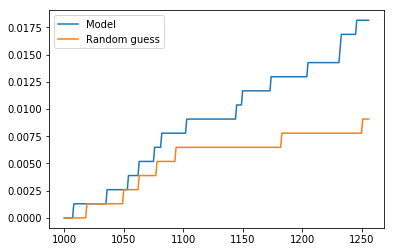

In [28]:
recall=[]
guesses = 3
recall_total = 0
recall_guess = 0

recall_guesses = []

for n in range(1000,1257):
    user = np.append(X[n:n+1].values[0][0:200],np.zeros(85))
    user_prefs = df_items.dot(user/np.sum(user))
    
    user_prefs.sort_values()
    already_liked=df_items[df_items.columns[np.where(X[n:n+1].values[0]>0)][0:5]].columns.values

    test_data=df_items[df_items.columns[np.where(X[n:n+1].values[0]>0)][5:]].columns.values
    
    user_suggestions =[s for s in user_prefs.index[::-1][0:guesses] if s not in already_liked]
    
    correct = [c for c in user_suggestions if c in test_data]
    guess_list = [g for g in random.sample(list(user_prefs.index), min(guesses,len(user_prefs))) if g in test_data]

    recall_total = recall_total + float(len(correct))
    recall_guess = recall_guess + float(len(guess_list))
   
    recall.append(recall_total)
    recall_guesses.append(recall_guess)
plt.plot(range(1000,1257),recall/(np.array(guesses)*257),label='Model')
plt.plot(range(1000,1257),recall_guesses/(np.array(guesses)*257),label='Random guess')
plt.legend()